# Heritability estimate on subtype from relational activation maps

##### Subtype:
- Niak preprocessed RELATIONAL task (new scrub method)
- 5 subtype
- **FD_scrubbed_mean regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed_mean" "Age_in_Yrs" "Gender" as covariate


## Build Pheno file

### Merge behavioral variables with subtypes weights

In [16]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display
import time

In [17]:
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
task_name = 'relational'

In [19]:
# Set up the paths 
path_root = "/home/yassinebha/Drive/HCP/"
net_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_RELATIONAL_18-Jun-2017/networks/")
out_path = os.path.join(path_root,"Solar_heritability/HCP_subtype/")

In [20]:
# Set up files name
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_{}_raw.csv".format(task_name))
solar_script = 'fcd_solar_h2r_test.sh'
pheno_save = 'solar_relational_spm_pheno.csv'.format(task_name)
pedig_save = 'solar_relational_spm_pedigre.csv'.format(task_name)
solar_out = 'subtype_5_{}_{}'.format(task_name,time.strftime("%d-%m-%Y"))
h2r_out_file = 'h2r_solar_{}_spm_{}.csv'
## Solar covariates
solar_cov = '    cov FD_scrubbed_mean Gender'

In [21]:
# List of network names
list_trial = os.listdir(net_path)
list_trial

['contrast_relation_vs_match', 'relation', 'match']

In [22]:
# Loop over each network and build weight file
for index, trial_name in enumerate(list_trial):
    file_path = os.path.join(net_path, trial_name, sbt_name_pattern.format(trial_name))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}".format(trial_name, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [23]:
dataframe.head()

,Subject,contrast_relation_vs_match_sub1,contrast_relation_vs_match_sub2,contrast_relation_vs_match_sub3,contrast_relation_vs_match_sub4,contrast_relation_vs_match_sub5,relation_sub1,relation_sub2,relation_sub3,relation_sub4,relation_sub5,match_sub1,match_sub2,match_sub3,match_sub4,match_sub5
0,HCP100206,0.092,-0.098,-0.261,0.009,0.155,0.234,-0.360,0.339,0.269,-0.326,-0.236,-0.146,-0.188,0.239,0.233
1,HCP100307,-0.043,0.154,-0.070,0.190,-0.226,-0.071,0.734,-0.724,-0.687,0.660,0.724,0.348,0.593,-0.644,-0.720
2,HCP100408,0.063,-0.215,0.219,-0.276,0.263,-0.060,-0.652,0.701,0.686,-0.692,-0.536,-0.205,-0.529,0.402,0.575
3,HCP100610,0.383,-0.161,0.209,-0.524,0.334,-0.287,-0.239,0.305,0.428,-0.361,-0.155,-0.188,-0.085,0.246,0.138
4,HCP101006,0.022,-0.169,-0.053,-0.125,0.247,0.011,-0.561,0.587,0.560,-0.571,-0.307,-0.131,-0.291,0.283,0.313


In [24]:
dataframe.Subject.describe()

count           768
unique          768
top       HCP857263
freq              1
Name: Subject, dtype: object

In [25]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(pheno_path)

In [26]:
file_pheno.head()

,Unnamed: 0,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BMI,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100206,0.098646,0.091387,0.118289,0.118289,0.104838,0.108467,HCP100206,27.0,1.0,...,26.64,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
1,HCP100307,0.108372,0.108372,0.098514,0.098514,0.103443,0.103443,HCP100307,27.0,2.0,...,22.96,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
2,HCP100408,0.113633,0.113633,0.145309,0.145309,0.129471,0.129471,HCP100408,33.0,1.0,...,27.75,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
3,HCP100610,0.184109,0.184109,0.170573,0.160610,0.172360,0.177341,HCP100610,27.0,1.0,...,36.91,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399
4,HCP101006,0.146478,0.146478,0.152041,0.148402,0.147440,0.149260,HCP101006,35.0,2.0,...,30.27,0.591952,-1.191472,0.037988,-0.682910,-0.516141,0.056823,-0.275139,-0.310782,0.308365


In [27]:
file_pheno.Subject.describe()

count           802
unique          802
top       HCP773257
freq              1
Name: Subject, dtype: object

In [28]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Handedness","Gender","BMI","FD_mean","FD_scrubbed_mean"]]
file_pheno_subset.head()

,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,27.0,65.0,1.0,26.64,0.108467,0.104838
1,HCP100307,27.0,95.0,2.0,22.96,0.103443,0.103443
2,HCP100408,33.0,55.0,1.0,27.75,0.129471,0.129471
3,HCP100610,27.0,85.0,1.0,36.91,0.177341,0.172360
4,HCP101006,35.0,90.0,2.0,30.27,0.149260,0.147440


In [29]:
# Replace gender M=1 and F=2
#file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
#file_pheno_subset.head()

In [30]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,802
unique,802
top,HCP773257
freq,1


In [31]:
file_weight[["Subject"]].describe()

,Subject
count,768
unique,768
top,HCP857263
freq,1


In [32]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,contrast_relation_vs_match_sub1,contrast_relation_vs_match_sub2,contrast_relation_vs_match_sub3,contrast_relation_vs_match_sub4,contrast_relation_vs_match_sub5,relation_sub1,relation_sub2,relation_sub3,relation_sub4,...,match_sub2,match_sub3,match_sub4,match_sub5,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,0.092,-0.098,-0.261,0.009,0.155,0.234,-0.360,0.339,0.269,...,-0.146,-0.188,0.239,0.233,27.0,65.0,1.0,26.64,0.108467,0.104838
1,HCP100307,-0.043,0.154,-0.070,0.190,-0.226,-0.071,0.734,-0.724,-0.687,...,0.348,0.593,-0.644,-0.720,27.0,95.0,2.0,22.96,0.103443,0.103443
2,HCP100408,0.063,-0.215,0.219,-0.276,0.263,-0.060,-0.652,0.701,0.686,...,-0.205,-0.529,0.402,0.575,33.0,55.0,1.0,27.75,0.129471,0.129471
3,HCP100610,0.383,-0.161,0.209,-0.524,0.334,-0.287,-0.239,0.305,0.428,...,-0.188,-0.085,0.246,0.138,27.0,85.0,1.0,36.91,0.177341,0.172360
4,HCP101006,0.022,-0.169,-0.053,-0.125,0.247,0.011,-0.561,0.587,0.560,...,-0.131,-0.291,0.283,0.313,35.0,90.0,2.0,30.27,0.149260,0.147440


In [33]:
merged_weight_pheno.ID.describe()

count           768
unique          768
top       HCP857263
freq              1
Name: ID, dtype: object

In [34]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

0

In [35]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

In [36]:
os.path.join(out_path,pheno_save)

'/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/solar_relational_spm_pheno.csv'

## Build trait file

In [37]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['contrast_relation_vs_match_sub1',
 'contrast_relation_vs_match_sub2',
 'contrast_relation_vs_match_sub3',
 'contrast_relation_vs_match_sub4',
 'contrast_relation_vs_match_sub5',
 'relation_sub1',
 'relation_sub2',
 'relation_sub3',
 'relation_sub4',
 'relation_sub5',
 'match_sub1',
 'match_sub2',
 'match_sub3',
 'match_sub4',
 'match_sub5',
 'Handedness',
 'BMI',
 'FD_mean',
 'FD_scrubbed_mean']

In [38]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [39]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037.0,1.0
1,HCP100307,Twin,NotMZ,51488.0,2.0
2,HCP100408,Twin,MZ,51730.0,1.0
3,HCP100610,Twin,NotMZ,52813.0,1.0
4,HCP101006,Twin,MZ,51283.0,2.0


In [40]:
file_pheno_pedig.Subject.describe()

count           802
unique          802
top       HCP773257
freq              1
Name: Subject, dtype: object

In [41]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [42]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.astype(int)
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


tail


,ID,fa,mo,sex,mztwin,hhID
797,HCP992673,fa_56143.0,mo_56143.0,2,,hh_56143.0
798,HCP992774,fa_51345.0,mo_51345.0,1,,hh_51345.0
799,HCP993675,fa_55800.0,mo_55800.0,2,,hh_55800.0
800,HCP994273,fa_52364.0,mo_52364.0,1,,hh_52364.0
801,HCP996782,fa_51541.0,mo_51541.0,2,,hh_51541.0


ID        802
fa        802
mo        802
sex       802
mztwin    802
hhID      802
dtype: int64

In [43]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
#for idx, twin in enumerate(uniques):
    #print("{} occurs {} times".format(twin, twin_counts[idx]))

In [44]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [45]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [46]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

,ID,fa,mo,sex,mztwin,hhID
37,M_HCP110007,fa_54572.0,mo_54572.0,2,pair_54572.0,hh_54572.0
55,M_HCP114823,fa_52925.0,mo_52925.0,2,pair_52925.0,hh_52925.0
82,M_HCP122317,fa_51802.0,mo_51802.0,1,pair_51802.0,hh_51802.0
88,M_HCP123824,fa_56022.0,mo_56022.0,1,pair_56022.0,hh_56022.0
91,M_HCP124422,fa_51529.0,mo_51529.0,2,pair_51529.0,hh_51529.0


ID        41
fa        41
mo        41
sex       41
mztwin    41
hhID      41
dtype: int64

In [47]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


In [48]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
694,M_HCP769064,fa_52803.0,mo_52803.0,1,pair_52803.0,hh_52803.0
721,M_HCP835657,fa_52137.0,mo_52137.0,2,pair_52137.0,hh_52137.0
723,M_HCP837964,fa_52875.0,mo_52875.0,2,pair_52875.0,hh_52875.0
765,M_HCP904044,fa_51290.0,mo_51290.0,2,pair_51290.0,hh_51290.0
789,M_HCP972566,fa_56077.0,mo_56077.0,2,pair_56077.0,hh_56077.0


In [49]:
df_pedig_final.count()

ID        843
fa        843
mo        843
sex       843
mztwin    843
hhID      843
dtype: int64

In [50]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

## Run SOLAR heritability estimate 

In [51]:
%%bash -s "$out_path" "$solar_cov" "$solar_script" 
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [52]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_relational_spm_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1573  Self
       117  Identical sib pair
      1686  Parent-offspring
       591  Siblings
       365  Unrelated



In [53]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
#if [ ! -d $3 ]; then
#   mkdir $3
#fi
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r_test.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00018 : Set-18 : FD_scrubbed_mean                                                  
All done.


## Results

In [54]:
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()

data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True]).reset_index(drop=True)
out_herit_df

,Trait,H2r,P,CovVarianceExpl
0,BMI_norm,0.600970,8.200038e-14,0.296178
1,FD_mean_norm,0.252487,1.020810e-02,0.850713
2,contrast_relation_vs_match_sub1_norm,0.108081,7.936100e-02,0.000369
3,contrast_relation_vs_match_sub2_norm,0.060637,1.886733e-01,0.000894
4,contrast_relation_vs_match_sub3_norm,0.042576,2.827860e-01,0.000308
5,contrast_relation_vs_match_sub4_norm,0.195697,4.111200e-03,0.000380
6,contrast_relation_vs_match_sub5_norm,0.114687,4.550950e-02,0.000730
7,match_sub1_norm,0.503857,5.864471e-16,0.000921
8,match_sub2_norm,0.534697,1.291376e-17,0.010806
9,match_sub3_norm,0.441040,1.037988e-11,0.001057


In [55]:
# remove unwanted Variables
out_herit_df_clean = out_herit_df[~out_herit_df['Trait'].str.strip().isin(['BMI_norm','FD_mean_norm','FD_scrubbed_mean_norm'])]

In [56]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(out_herit_df_clean['P'], alpha=0.05, method='fdr_bh')
out_herit_df_clean.insert(3,'FDR',pcorr_vec[1])
out_herit_df_clean.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))

In [57]:
out_herit_df_clean

,Trait,H2r,P,FDR,FDR_log10,CovVarianceExpl
2,contrast_relation_vs_match_sub1_norm,0.108081,7.936100e-02,9.157038e-02,1.038245,0.000369
3,contrast_relation_vs_match_sub2_norm,0.060637,1.886733e-01,2.021500e-01,0.694326,0.000894
4,contrast_relation_vs_match_sub3_norm,0.042576,2.827860e-01,2.827860e-01,0.548542,0.000308
5,contrast_relation_vs_match_sub4_norm,0.195697,4.111200e-03,5.606182e-03,2.251333,0.000380
6,contrast_relation_vs_match_sub5_norm,0.114687,4.550950e-02,5.688687e-02,1.244988,0.000730
7,match_sub1_norm,0.503857,5.864471e-16,1.466118e-15,14.833831,0.000921
8,match_sub2_norm,0.534697,1.291376e-17,4.842661e-17,16.314916,0.010806
9,match_sub3_norm,0.441040,1.037988e-11,1.729980e-11,10.761959,0.001057
10,match_sub4_norm,0.506186,1.253704e-15,2.686508e-15,14.570812,0.002993
11,match_sub5_norm,0.493260,3.217633e-15,6.033061e-15,14.219462,0.000405


In [58]:
# Loop over trait and create heritability table for radar plot
#drop_list = ['BMI','FD_mean','FD_scrubbed_mean','Handedness']
#list_new = [x for x in new_list if x not in drop_list ]

In [59]:
## Loop over trait and create heritability table for radar plot
#list_trial = [xx.replace('-','_') for xx in list_trial]
for trait_herit in list_trial:
    mask_df = [x[:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r']][mask_df]
    # extract trial
    column_net = [''.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r']]
    # Pivot table
    out_herit_final = out_herit_clean.pivot(index='Trial',columns='Subt',values='H2r')
    out_herit_final.index.name=None
    out_herit_final.to_csv(os.path.join(out_path,solar_out,h2r_out_file.format(task_name,trait_herit)))

In [60]:
out_herit_final

Subt,sub1,sub2,sub3,sub4,sub5
match,0.503857,0.534697,0.44104,0.506186,0.49326


In [61]:
##### R section #########

In [62]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
# devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)
import warnings
warnings.filterwarnings('ignore')

In [65]:
%%R
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

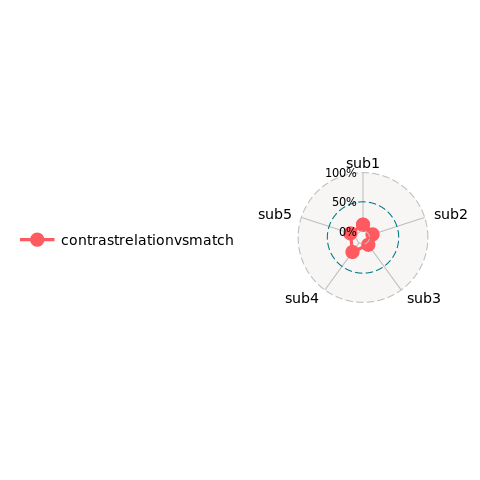

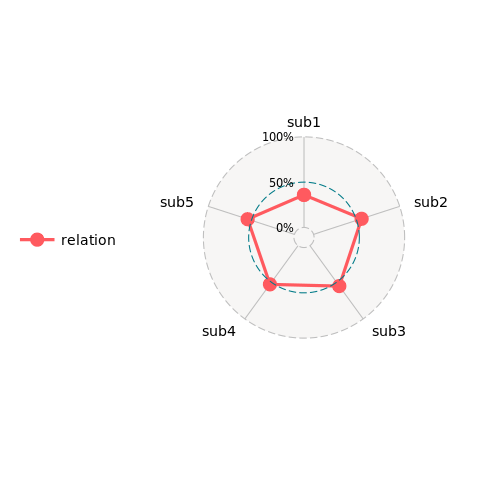

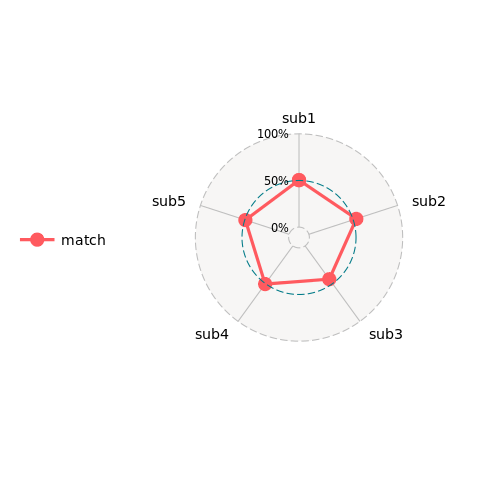

In [67]:
%%R -i out_path,solar_out,task_name,list_trial,path_root
for (ii in list_trial) {
    MyData <- read.csv(file=paste(out_path,solar_out,"/h2r_solar_",task_name,'_spm_',ii,'.csv',sep = ''))
    # plot radar 
    image=ggradar(MyData, grid.min = 0,
                  grid.mid = 0.5, grid.max = 1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5) +
    theme(legend.text = element_text(size = 14))
    ggsave(file=paste(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_RELATIONAL_18-Jun-2017/" ,ii,"_heritability.svg",sep = ''), plot=image, width=10, height=8)
    print(image)
    }